In [1]:
!pip install plotly

In [2]:
import pandas as pd
import datetime
from datetime import date , timedelta

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio


pio.templates.default = "plotly_white"



In [3]:
data = pd.read_csv('twtr.csv')
print(data.head(100))

          Date       Open       High        Low      Close  Adj Close  \
0    11/7/2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1    11/8/2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2   11/11/2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3   11/12/2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4   11/13/2013  41.029999  42.869999  40.759998  42.599998  42.599998   
..         ...        ...        ...        ...        ...        ...   
95   3/27/2014  45.090000  46.400002  43.310001  46.320000  46.320000   
96   3/28/2014  46.650002  47.340000  45.700001  47.299999  47.299999   
97   3/31/2014  47.549999  47.750000  46.430000  46.669998  46.669998   
98    4/1/2014  46.709999  47.590000  46.180000  46.980000  46.980000   
99    4/2/2014  47.400002  47.439999  45.509998  45.730000  45.730000   

         Volume  
0   117701670.0  
1    27925307.0  
2    16113941.0  
3     6316755.0  
4     8688325.0  
..          ...

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB
None


In [5]:
print(data.isnull().sum())



Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


In [6]:
data = data.dropna()
print(data.head(100))

          Date       Open       High        Low      Close  Adj Close  \
0    11/7/2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1    11/8/2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2   11/11/2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3   11/12/2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4   11/13/2013  41.029999  42.869999  40.759998  42.599998  42.599998   
..         ...        ...        ...        ...        ...        ...   
95   3/27/2014  45.090000  46.400002  43.310001  46.320000  46.320000   
96   3/28/2014  46.650002  47.340000  45.700001  47.299999  47.299999   
97   3/31/2014  47.549999  47.750000  46.430000  46.669998  46.669998   
98    4/1/2014  46.709999  47.590000  46.180000  46.980000  46.980000   
99    4/2/2014  47.400002  47.439999  45.509998  45.730000  45.730000   

         Volume  
0   117701670.0  
1    27925307.0  
2    16113941.0  
3     6316755.0  
4     8688325.0  
..          ...

In [7]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
print(data.describe())


              Open         High          Low        Close    Adj Close  \
count  2259.000000  2259.000000  2259.000000  2259.000000  2259.000000   
mean     36.020286    36.699881    35.339465    36.003625    36.003625   
std      14.118463    14.372057    13.828724    14.089989    14.089989   
min      13.950000    14.220000    13.725000    14.010000    14.010000   
25%      25.550000    26.215001    24.912501    25.410000    25.410000   
50%      35.419998    36.099998    34.820000    35.490002    35.490002   
75%      44.205000    45.015000    43.327501    44.135000    44.135000   
max      78.360001    80.750000    76.050003    77.629997    77.629997   

             Volume  
count  2.259000e+03  
mean   2.175186e+07  
std    1.909988e+07  
min    0.000000e+00  
25%    1.233530e+07  
50%    1.691305e+07  
75%    2.428082e+07  
max    2.692131e+08  


In [9]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
get_ipython().system('pip install statsmodels')

In [11]:
import statistics as st
from statsmodels.stats import weightstats as stests
from numpy import random

high = data['High']
print('Data=' ,high)
high_mean = st.mean(high)
print("Mean Data = " , high_mean)
high_stdev = st.stdev(high)
print("Standard Deviation" , high_stdev)

ztest  , pval = stests.ztest(high , value = 30)
print("Z-test Score" , ztest)
print("p-Value " , pval)

if pval<0.05:
    print("Reject Null hypothesis")
else:
    print("Accept the Null hypothesis")

Data= 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean Data =  36.69988069278442
Standard Deviation 14.372056692309659
Z-test Score 22.15676048174423
p-Value  8.978177265940086e-109
Reject Null hypothesis


In [12]:
from scipy.stats import ttest_1samp
import statistics as st



high = data['High']
print('Data=' ,high)
high_mean = st.mean(high)
print("Mean Data = " , high_mean)
high_stdev = st.stdev(high)
print("Standard Deviation" , high_stdev)

t_test  , pval = ttest_1samp(high , 50)
print("T-test Score" , t_test)
print("p-Value " , pval)

if pval<0.05:
    print("Reject Null hypothesis")
else:
    print("Accept the Null hypothesis")


Data= 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean Data =  36.69988069278442
Standard Deviation 14.372056692309659
T-test Score -43.984000817502285
p-Value  9.208373050426324e-306
Reject Null hypothesis


In [13]:
import pandas as pd
import scipy.stats
import io
data = pd.read_csv('twtr.csv')
print(data.head(5))
data = data.dropna()

grp1= data['High']
grp2 = data['Low']
print(grp1.head(5))
print(grp2.head(5))

F , pval = scipy.stats.f_oneway(grp1 , grp2)
print(F)
print(pval)

if  pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

    



         Date       Open       High        Low      Close  Adj Close  \
0   11/7/2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1   11/8/2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2  11/11/2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3  11/12/2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4  11/13/2013  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  
0    50.090000
1    46.939999
2    43.000000
3    43.779999
4    42.869999
Name: High, dtype: float64
0    44.000000
1    40.685001
2    39.400002
3    41.830002
4    40.759998
Name: Low, dtype: float64
10.510084066032649
0.0011958722702637046
Reject Null Hypothesis


In [14]:
from scipy import stats
datas = {'High':data['High'] , 'Low':data['Low']}
print(datas)
chisq  , pval = scipy.stats.chisquare(datas['Low'])

alpha = 0.05
print("Chi-Square value =" , chisq)

print("p-value is " , pval)


if pval<alpha:
    print("Dependent {Reject Ho}")
else:
    print("Independent{Accept the Ho}")



{'High': 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64, 'Low': 0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2254    49.549999
2255    50.520000
2256    52.200001
2257    52.770000
2258    53.700001
Name: Low, Length: 2259, dtype: float64}
Chi-Square value = 12218.788864355833
p-value is  0.0
Dependent {Reject Ho}


In [15]:
from scipy import stats
import numpy as np
import pandas as pd

mu  , sigma = 100 , 5

array = np.random.normal(mu , sigma , 200)

array[90] = 180
array[50] = -40

df = pd.DataFrame(array , columns=['Data'])
print(df)

z = np.abs(stats.zscore(df))

print(z)


print("Nos of outliers=" ,df[z>3].count())
print("Outliers are:",df[(z>3)|(z<-3)])
df_new =  df[(z>-3)&(z<3)]

print(df_new)
print(df.shape)
print(df_new.shape)


           Data
0     94.046384
1    105.357562
2    100.523448
3    101.298788
4     96.086468
..          ...
195   96.467247
196   94.922818
197   96.109771
198   94.825780
199  104.435695

[200 rows x 1 columns]
         Data
0    0.472190
1    0.428841
2    0.043763
3    0.105525
4    0.309680
..        ...
195  0.279348
196  0.402374
197  0.307824
198  0.410104
199  0.355407

[200 rows x 1 columns]
Nos of outliers= Data    2
dtype: int64
Outliers are:      Data
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
..    ...
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN

[200 rows x 1 columns]
           Data
0     94.046384
1    105.357562
2    100.523448
3    101.298788
4     96.086468
..          ...
195   96.467247
196   94.922818
197   96.109771
198   94.825780
199  104.435695

[200 rows x 1 columns]
(200, 1)
(200, 1)


In [16]:
data = pd.read_csv('twtr.csv')
print(data.head(100))



          Date       Open       High        Low      Close  Adj Close  \
0    11/7/2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1    11/8/2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2   11/11/2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3   11/12/2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4   11/13/2013  41.029999  42.869999  40.759998  42.599998  42.599998   
..         ...        ...        ...        ...        ...        ...   
95   3/27/2014  45.090000  46.400002  43.310001  46.320000  46.320000   
96   3/28/2014  46.650002  47.340000  45.700001  47.299999  47.299999   
97   3/31/2014  47.549999  47.750000  46.430000  46.669998  46.669998   
98    4/1/2014  46.709999  47.590000  46.180000  46.980000  46.980000   
99    4/2/2014  47.400002  47.439999  45.509998  45.730000  45.730000   

         Volume  
0   117701670.0  
1    27925307.0  
2    16113941.0  
3     6316755.0  
4     8688325.0  
..          ...

In [17]:
print(data.isnull().sum())


Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


In [18]:
data = data.dropna()
print(data.head(50))


          Date       Open       High        Low      Close  Adj Close  \
0    11/7/2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1    11/8/2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2   11/11/2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3   11/12/2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4   11/13/2013  41.029999  42.869999  40.759998  42.599998  42.599998   
5   11/14/2013  42.340000  45.669998  42.240002  44.689999  44.689999   
6   11/15/2013  45.250000  45.270000  43.430000  43.980000  43.980000   
7   11/18/2013  43.500000  43.950001  40.849998  41.139999  41.139999   
8   11/19/2013  41.389999  41.900002  40.000000  41.750000  41.750000   
9   11/20/2013  41.400002  41.750000  40.509998  41.049999  41.049999   
10  11/21/2013  41.250000  42.490002  40.369999  42.060001  42.060001   
11  11/22/2013  41.810001  42.279999  40.970001  41.000000  41.000000   
12  11/25/2013  41.080002  41.139999  38.799999  39

In [27]:

#11)Show the Twitter stock prices over the years  and give a conclusion.

figure = go.Figure(data = [go.Candlestick(x = data["Date"],
                                        open =data["Open"],
                                       high = data["High"],
                                       low = data["Low"],
                                       close = data["Close"])])

figure.update_layout(title="Twitter Stcok Prices Over the Years" , xaxis_rangeslider_visible=False)

figure.show()


In [2]:
#12)Now compare the close vs date column for Twitter prices over the years.

figure = px.bar(data , 
               x = "Date",
               y = "Close",
               color = "Close")

figure.update_xaxes(rangeslider_visible= True)
figure.show()




NameError: name 'px' is not defined

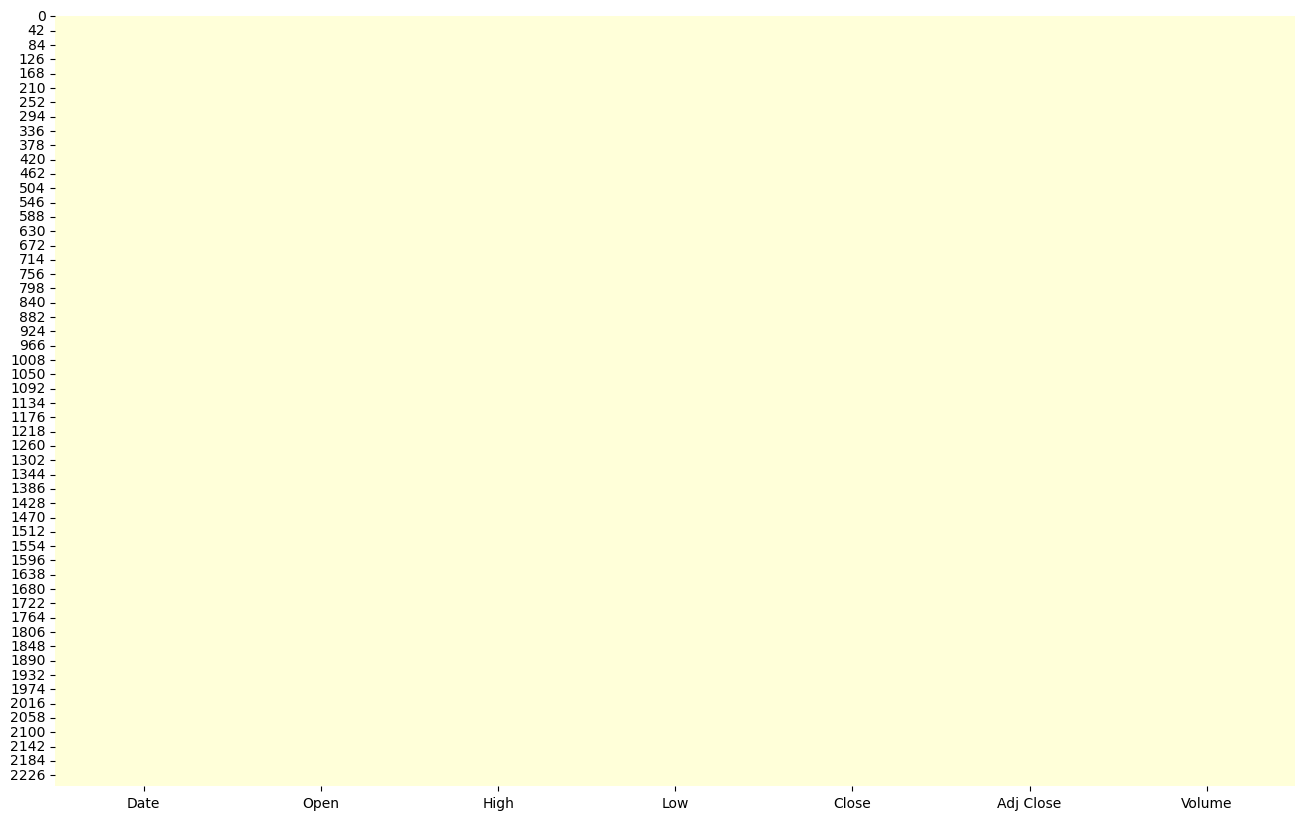

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

sns.heatmap(data.isnull() , cbar = False , cmap="YlGnBu")

plt.show()

In [22]:
figure = px.bar(data , x = "Date" , y ="Close" , color = "Close")
figure.update_xaxes(rangeslider_visible = True)

figure.update_layout(title = "Twitter Stock prices over the years" , xaxis_rangeslider_visible=False)

figure.update_xaxes(
    
    
    
    
    
    
    
    rangeselector = dict(
        buttons = list([
            
            dict(count = 1 ,label = "1m" , step ="month" ,stepmode ="backward"),
            dict(count = 6 ,label = "6m" , step ="month" ,stepmode ="backward"),
            dict(count = 3 ,label = "3m" , step ="month" ,stepmode ="backward"),
            dict(count = 1 ,label = "1y" , step ="year" ,stepmode ="backward"),
            dict(count = 2 ,label = "2y" , step ="year" ,stepmode ="backward"),
            dict(step="all"),
                
            
        ])
    
    
    )

)


figure.show()



In [26]:
#15)Give the complete timeline of Twitter in the stock market. (Line Graph)
data["Date"] = pd.to_datetime(data["Date"], format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year

data["Month"] = data["Date"].dt.month




fig = px.line(data , 
             x="Month",
             y="Close",
             color ="Year",
             title ="Complete timeline of Twitter")

fig.show()



ValueError: time data "11/7/2013" at position 0 doesn't match format specified